# Comcast Telecom Consumer Complaints ..

### Project

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

    Ticket #: Ticket number assigned to each complaint
    Customer Complaint: Description of complaint
    Date: Date of complaint
    Time: Time of complaint
    Received Via: Mode of communication of the complaint
    City: Customer city
    State: Customer state
    Zipcode: Customer zip
    Status: Status of complaint
    Filing on behalf of someone

Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

    Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

    Which state has the maximum complaints
    Which state has the highest percentage of unresolved complaints

- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_tcc=pd.read_csv('../dataset/Comcast.csv')
df_tcc.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
df_tcc.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


In [4]:
df_tcc.shape

(2224, 11)

In [5]:
df_tcc.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [6]:
df_tcc.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [7]:
df_tcc['Date']=pd.to_datetime(df_tcc['Date'])


In [8]:
df_tcc.sort_values(by='Date',inplace=True, ascending=True)


In [9]:
type(df_tcc)

pandas.core.frame.DataFrame

In [10]:
df_tcc.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2144,211677,Comcast refusal of service,2015-04-01,04-Jan-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No
71,211976,Fraudulent claims reported to collections agency,2015-04-01,04-Jan-15,1:26:53 PM,Customer Care Call,Atlanta,Georgia,30312,Closed,No
1430,211478,Comcast,2015-04-01,04-Jan-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No
908,211904,Unable to get in touch with anyone that has th...,2015-04-01,04-Jan-15,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No
2133,212381,"Comcast speeds as low as 12 MB/s, paying for 1...",2015-04-01,04-Jan-15,3:10:12 PM,Customer Care Call,Washington,Pennsylvania,15301,Closed,No


In [11]:
df_tcc.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [12]:
df_tcc[['Day','Month', 'Year']]=df_tcc.Date_month_year.str.split('-', expand=True)
df_tcc

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Year
2144,211677,Comcast refusal of service,2015-04-01,04-Jan-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No,04,Jan,15
71,211976,Fraudulent claims reported to collections agency,2015-04-01,04-Jan-15,1:26:53 PM,Customer Care Call,Atlanta,Georgia,30312,Closed,No,04,Jan,15
1430,211478,Comcast,2015-04-01,04-Jan-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No,04,Jan,15
908,211904,Unable to get in touch with anyone that has th...,2015-04-01,04-Jan-15,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No,04,Jan,15
2133,212381,"Comcast speeds as low as 12 MB/s, paying for 1...",2015-04-01,04-Jan-15,3:10:12 PM,Customer Care Call,Washington,Pennsylvania,15301,Closed,No,04,Jan,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,376328,Comcast Failed to deliver service that was adv...,2015-06-30,30-Jun-15,11:24:39 PM,Internet,Houston,Texas,77064,Open,No,30,Jun,15
895,375847,Comcast bundles useless services to charge more.,2015-06-30,30-Jun-15,6:36:52 PM,Internet,Houston,Texas,77025,Open,No,30,Jun,15
191,375249,Comcast cable,2015-06-30,30-Jun-15,3:47:29 PM,Internet,Beach Haven,New Jersey,8008,Pending,No,30,Jun,15
1096,375292,Underhanded sales techniques,2015-06-30,30-Jun-15,3:59:45 PM,Internet,Lakewood,Colorado,80215,Pending,No,30,Jun,15


In [13]:
df_tel=df_tcc.pop('Date')
df_tel

2144   2015-04-01
71     2015-04-01
1430   2015-04-01
908    2015-04-01
2133   2015-04-01
          ...    
896    2015-06-30
895    2015-06-30
191    2015-06-30
1096   2015-06-30
2177   2015-06-30
Name: Date, Length: 2224, dtype: datetime64[ns]

In [14]:
df_tcc

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Year
2144,211677,Comcast refusal of service,04-Jan-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No,04,Jan,15
71,211976,Fraudulent claims reported to collections agency,04-Jan-15,1:26:53 PM,Customer Care Call,Atlanta,Georgia,30312,Closed,No,04,Jan,15
1430,211478,Comcast,04-Jan-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No,04,Jan,15
908,211904,Unable to get in touch with anyone that has th...,04-Jan-15,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No,04,Jan,15
2133,212381,"Comcast speeds as low as 12 MB/s, paying for 1...",04-Jan-15,3:10:12 PM,Customer Care Call,Washington,Pennsylvania,15301,Closed,No,04,Jan,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,376328,Comcast Failed to deliver service that was adv...,30-Jun-15,11:24:39 PM,Internet,Houston,Texas,77064,Open,No,30,Jun,15
895,375847,Comcast bundles useless services to charge more.,30-Jun-15,6:36:52 PM,Internet,Houston,Texas,77025,Open,No,30,Jun,15
191,375249,Comcast cable,30-Jun-15,3:47:29 PM,Internet,Beach Haven,New Jersey,8008,Pending,No,30,Jun,15
1096,375292,Underhanded sales techniques,30-Jun-15,3:59:45 PM,Internet,Lakewood,Colorado,80215,Pending,No,30,Jun,15


###### Trend Chart for number of complaints for monthly levels

In [15]:
monthly=pd.crosstab(index=df_tcc['Customer Complaint'],columns=df_tcc['Month'],margins=True)
monthly

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,All
Customer Complaint,,,,,,,,,,,,,
(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!,0,0,0,0,0,0,1,0,0,0,0,0,1
10 Days No Service - 12 Appointments Comcast Hasn't Shown Up - Comcast Has Not Fixed Home Infinity X1 - In 10 Days- Cannot Make 911 Calls,0,0,0,0,0,0,1,0,0,0,0,0,1
2 months and Comcast has not fixed problem,0,0,0,0,0,0,1,0,0,0,0,0,1
2+ Day Degraded Services,0,0,0,0,0,0,1,0,0,0,0,0,1
300 GB monthly allowance,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
without service despite willingness to pay,0,0,0,0,0,0,1,0,0,0,0,0,1
xfinitty tv and exfinity alarm,0,0,0,0,0,0,0,0,1,0,0,0,1
xfinity Internet,0,0,0,0,0,0,0,0,1,0,0,0,1


In [16]:
Mnth=df_tcc.groupby([df_tcc['Month']])['Month'].agg(['count']).reset_index(inplace=False)
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Mnth['Month']=pd.Categorical(Mnth['Month'],categories=months,ordered=True)
Mnth.sort_values(by='Month',inplace=True)
Mnth

,Month,count
4,Jan,55
3,Feb,59
7,Mar,45
0,Apr,375
8,May,317
6,Jun,1046
5,Jul,49
1,Aug,67
11,Sep,55
10,Oct,53


No handles with labels found to put in legend.


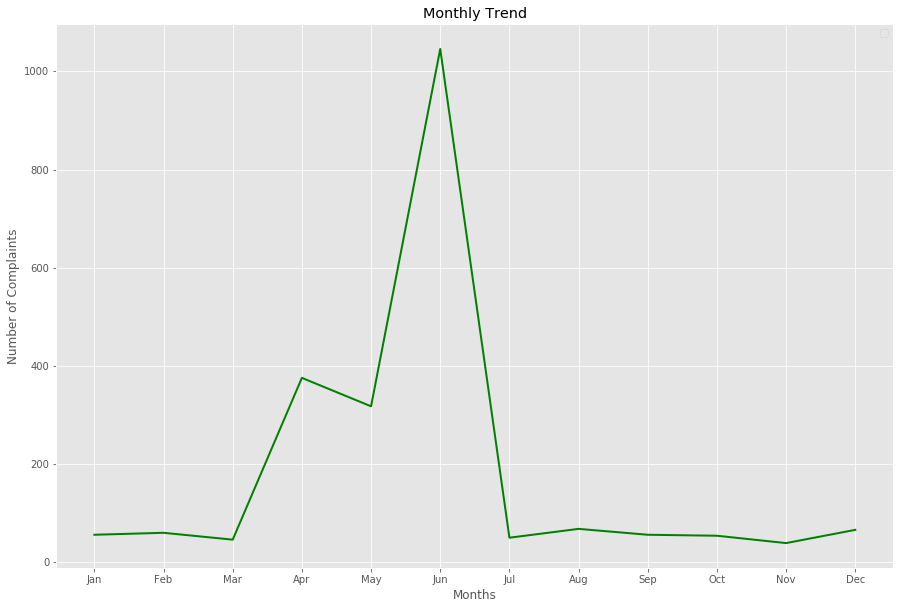

In [17]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(15,10))
plt.plot(Mnth['Month'],Mnth['count'],'g',linewidth=2)
plt.xlabel('Months')
plt.ylabel('Number of Complaints')
plt.title('Monthly Trend')
plt.legend()
plt.show()

###### Trend chart for the number of complaints at daily granularity levels.


In [18]:
daily=pd.crosstab(index=df_tcc['Customer Complaint'],columns=df_tcc['Date_month_year'],margins=True)
daily

Date_month_year,04-Apr-15,04-Aug-15,04-Dec-15,04-Feb-15,04-Jan-15,04-Jul-15,04-Jun-15,04-Mar-15,04-May-15,04-Nov-15,...,28-Jun-15,28-May-15,29-Apr-15,29-Jun-15,29-May-15,30-Apr-15,30-Jun-15,30-May-15,31-May-15,All
Customer Complaint,,,,,,,,,,,,,,,,,,,,,
(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10 Days No Service - 12 Appointments Comcast Hasn't Shown Up - Comcast Has Not Fixed Home Infinity X1 - In 10 Days- Cannot Make 911 Calls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2 months and Comcast has not fixed problem,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2+ Day Degraded Services,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300 GB monthly allowance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
without service despite willingness to pay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
xfinitty tv and exfinity alarm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
xfinity Internet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
Daily=df_tcc.groupby([df_tcc['Date_month_year']])['Date_month_year'].agg(['count']).reset_index(inplace=False)
Daily

,Date_month_year,count
0,04-Apr-15,12
1,04-Aug-15,28
2,04-Dec-15,15
3,04-Feb-15,27
4,04-Jan-15,18
...,...,...
86,29-May-15,14
87,30-Apr-15,24
88,30-Jun-15,53
89,30-May-15,9


In [20]:
Daily['Date_month_year']=pd.to_datetime(Daily['Date_month_year'])
Daily.sort_values(by='Date_month_year',inplace=True, ascending=True)


In [21]:
Daily.head()

,Date_month_year,count
4,2015-01-04,18
16,2015-01-05,12
28,2015-01-06,25
3,2015-02-04,27
15,2015-02-05,7


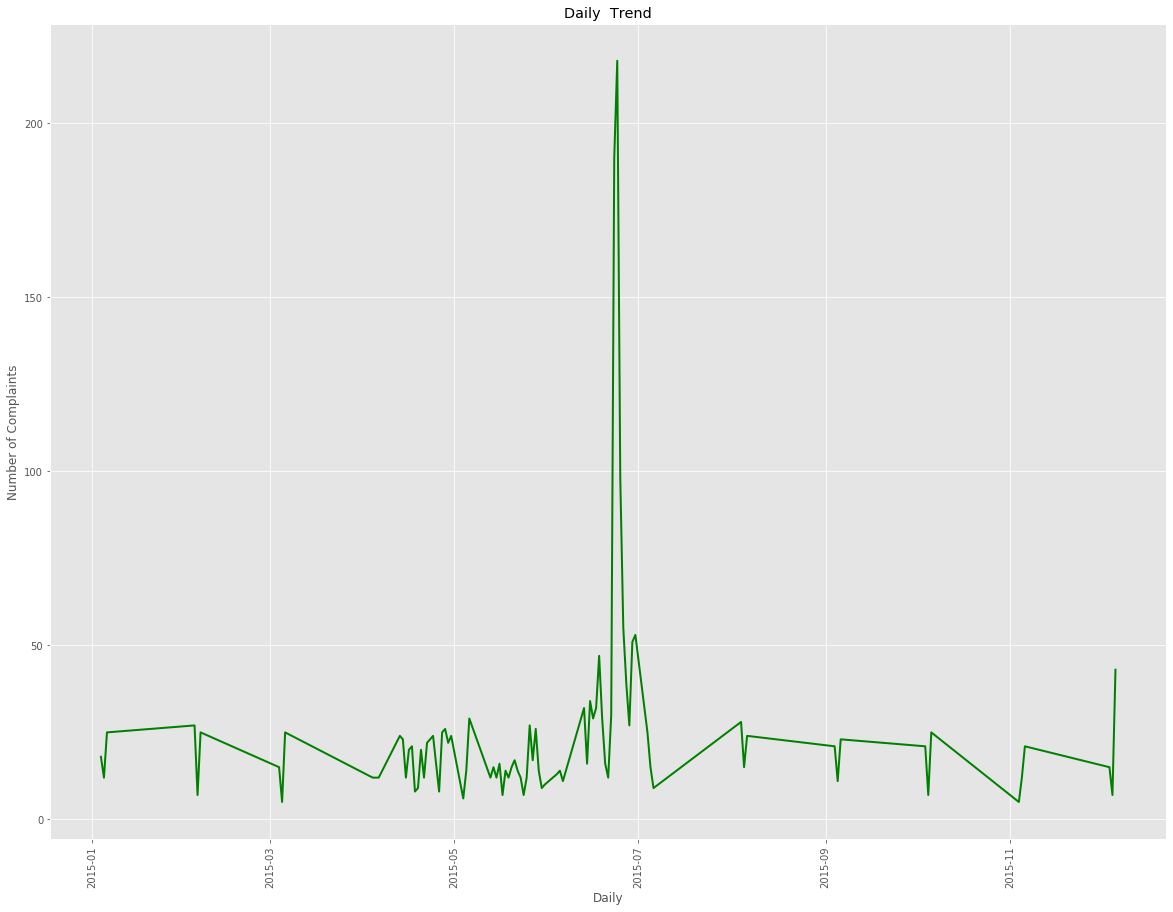

In [22]:
from matplotlib import style
import matplotlib.dates as mdates#see increasing frequency of xticks for datetime
style.use('ggplot')
plt.figure(figsize=(20,15))
plt.plot(Daily['Date_month_year'],Daily['count'],'g',linewidth=2)
plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(mdates.DayLocator)
plt.xlabel('Daily')
plt.ylabel('Number of Complaints')
plt.title('Daily  Trend')
#plt.legend()
plt.show()

In [23]:
df_tcc['Customer Complaint'].unique()

array(['Comcast refusal of service',
       'Fraudulent claims reported to collections agency', 'Comcast', ...,
       'Comcast bundles useless services to charge more.',
       'Underhanded sales techniques', 'Slow internet service'],
      dtype=object)

In [24]:
df_tcc['Customer Complaint'].nunique()

1841

In [25]:
val=df_tcc['Customer Complaint'].value_counts()
val

Comcast                                                    83
Comcast Internet                                           18
Comcast Data Cap                                           17
comcast                                                    13
Comcast Data Caps                                          11
                                                           ..
Paying for high speed internet and receiving low speeds     1
Comcast Business Services-Email Accounts                    1
COMCAST - Slow Down Imternet Speed                          1
Comcast Corporation                                         1
Comcast Data Meter/Cap                                      1
Name: Customer Complaint, Length: 1841, dtype: int64

In [26]:
CC=pd.crosstab(index=df_tcc['Customer Complaint'],columns ='Frequency')
CC

col_0,Frequency
Customer Complaint,
(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!,1
10 Days No Service - 12 Appointments Comcast Hasn't Shown Up - Comcast Has Not Fixed Home Infinity X1 - In 10 Days- Cannot Make 911 Calls,1
2 months and Comcast has not fixed problem,1
2+ Day Degraded Services,1
300 GB monthly allowance,1
...,...
why am I paying for this ?,1
without service despite willingness to pay,1
xfinitty tv and exfinity alarm,1


In [27]:
max(val) # we see that maximum complaint is about Comcast, next being Comcast Internet

83

In [28]:
CC['Frequency'].max()

83

###### We see that maximum complaint is about Comcast, next being Comcast Internet

##### Open & Pending is categorized as Open and Closed & Solved is categorized as Closed.


In [29]:
df_tcc['Status'].nunique()

4

In [30]:
df_tcc['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [31]:
df_tcc['Status'].replace({'Pending': 'Open', 'Solved': 'Closed'},inplace=True)

In [32]:

df_tcc['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

##### State wise status of complaints in a stacked bar chart

In [33]:
df_tcc['State'].value_counts()# we see that Georgia has the most complaints

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
New Hampshire            12
Delaware                 12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
Ohio                      3
Vermont             

In [34]:
Complaint_status=pd.crosstab(index=df_tcc['State'],columns=df_tcc['Status'])
Complaint_status

Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


In [35]:
Complaint_status.index

Index(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia',
       'District of Columbia', 'Florida', 'Georgia', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia'],
      dtype='object', name='State')

In [36]:
State=['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia',
       'District of Columbia', 'Florida', 'Georgia', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia']

In [37]:
Open=Complaint_status['Open'].tolist()
Closed=Complaint_status['Closed'].tolist()

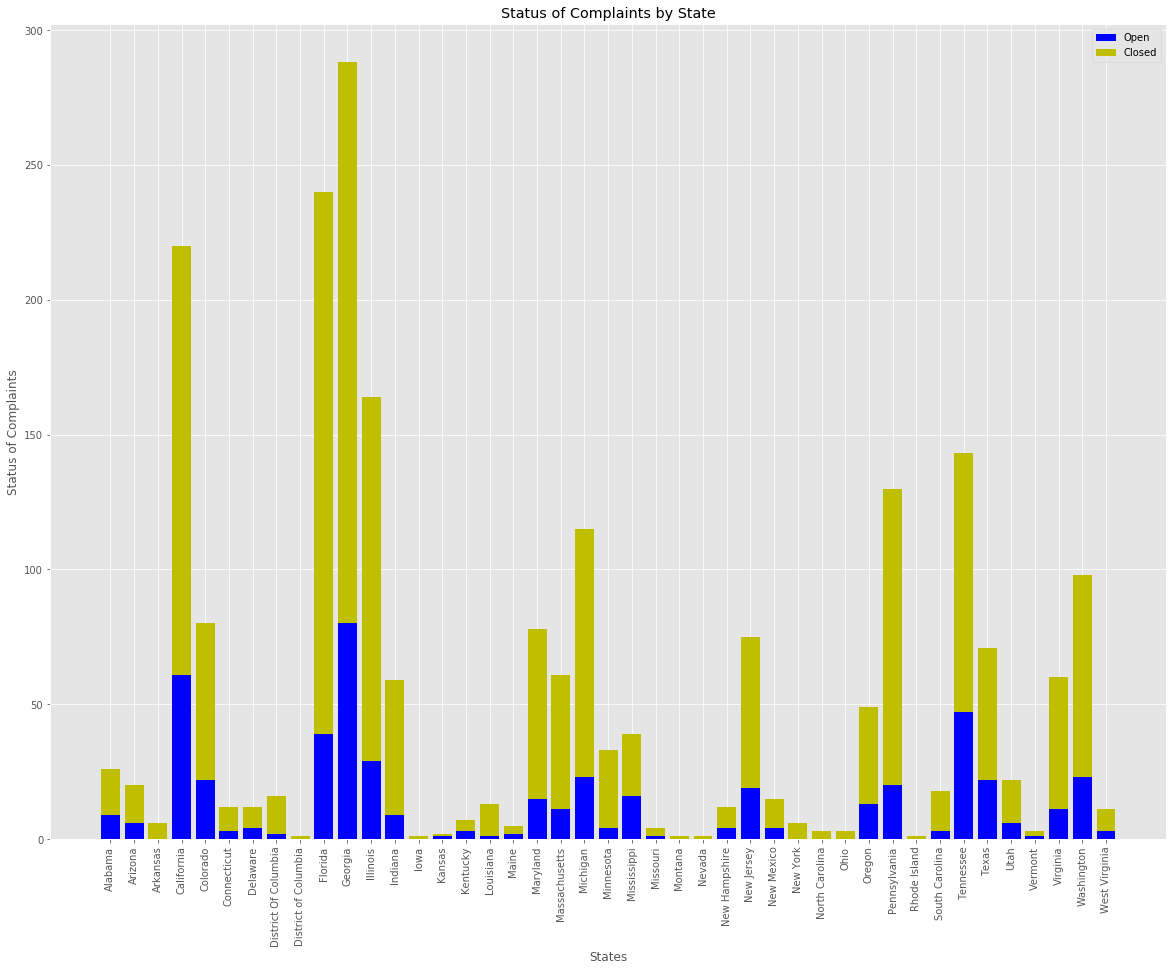

In [38]:
plt.figure(figsize=(20,15))
plt.bar(State,Open,color='b')
plt.bar(State,Closed, bottom=Open,color='y')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Status of Complaints')
plt.legend(['Open','Closed'])
plt.title('Status of Complaints by State')
plt.show()

In [39]:
Complaint_status=pd.crosstab(index=df_tcc['State'],columns=df_tcc['Status'],margins=True)
Complaint_status['Percentage Open']= (Complaint_status['Open']/Complaint_status['All'])*100
Complaint_status

Status,Closed,Open,All,Percentage Open
State,,,,
Alabama,17,9,26,34.615385
Arizona,14,6,20,30.000000
Arkansas,6,0,6,0.000000
California,159,61,220,27.727273
Colorado,58,22,80,27.500000
Connecticut,9,3,12,25.000000
Delaware,8,4,12,33.333333
District Of Columbia,14,2,16,12.500000
District of Columbia,1,0,1,0.000000


##### We see that Georgia has the maximum complaints and Kentucky has the haighest percentage of unresolved complaints

##### percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [40]:
df_tcc['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [41]:
Via_status=pd.crosstab(index=df_tcc['Received Via'],columns=df_tcc['Status'],margins=True)
Via_status['Percentage Closed']= (Via_status['Closed']/Via_status['All'])*100
Via_status

Status,Closed,Open,All,Percentage Closed
Received Via,,,,
Customer Care Call,864,255,1119,77.211796
Internet,843,262,1105,76.289593
All,1707,517,2224,76.753597
